#### Q4. Test one other gestalt principle of your choice. For this one, you have to figure out the training and testing strategies for yourselves. 

We chose "The principle of Closure". 
The principle of closure states that when we look at a complex arrangement of visual elements, we tend to look for a single, recognizable pattern. In other words, when you see an image that has missing parts, your brain will fill in the blanks and make a complete image so you can still recognize the pattern.

Here, a dataset containing discountinuous circles, random arcs is generated 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Function to generate a reference circle
def generate_reference_circle(n, radius=40, thickness=1.2):
    image = np.ones((n, n))
    center = n // 2  # Center of the image

    # Draw the circle
    for angle in np.arange(0, 360, 0.1):
        rad = np.radians(angle)
        x = int(center + radius * np.cos(rad))
        y = int(center + radius * np.sin(rad))

        # Draw thickness
        for t in range(-int(thickness)//2, int(thickness)//2 + 1):
            if 0 <= x + t < n:
                image[x + t, y] = 0
            if 0 <= y + t < n:
                image[x, y + t] = 0

    return image

# Function to generate discontinuous circles with a single gap
def generate_discontinuous_circle_with_gap(n, radius=40, gap_angle=36, thickness=1.2):
    image = np.ones((n, n))
    center = n // 2
    gap_position = random.randint(0, 9)  # Random position for the gap (0 to 9)

    # Calculate start and end angles for the gap
    gap_start_angle = gap_position * gap_angle - gap_angle / 2
    gap_end_angle = gap_position * gap_angle + gap_angle / 2

    # Draw the circle
    for angle in np.arange(0, 360, 0.1):
        if not (gap_start_angle <= angle <= gap_end_angle):
            rad = np.radians(angle)
            x = int(center + radius * np.cos(rad))
            y = int(center + radius * np.sin(rad))

            # Draw thickness
            for t in range(-int(thickness)//2, int(thickness)//2 + 1):
                if 0 <= x + t < n:
                    image[x + t, y] = 0
                if 0 <= y + t < n:
                    image[x, y + t] = 0

    return image

# Function to generate discontinuous circles with multiple gaps
def generate_discontinuous_circle_with_multiple_gaps(n, radius=40, num_gaps=5, thickness=1.2, min_gap_length=2, max_gap_length=60):
    image = np.ones((n, n))
    center = n // 2

    # Generate random start positions and lengths for the gaps
    gap_positions = [random.uniform(0, 360) for _ in range(num_gaps)]
    gap_lengths = [random.uniform(min_gap_length, max_gap_length) for _ in range(num_gaps)]

    # Draw the circle with random gaps
    for angle in np.arange(0, 360, 0.1):
        skip = False
        for gap_pos, gap_len in zip(gap_positions, gap_lengths):
            if gap_pos <= angle <= gap_pos + gap_len:
                skip = True
                break
        
        if skip:
            continue  # Skip angles that fall within a gap

        # Convert angle to radians
        rad = np.radians(angle)
        x = int(center + radius * np.cos(rad))
        y = int(center + radius * np.sin(rad))

        # Draw thickness
        for t in range(-int(thickness)//2, int(thickness)//2 + 1):
            if 0 <= x + t < n:
                image[x + t, y] = 0
            if 0 <= y + t < n:
                image[x, y + t] = 0

    return image


# Function to generate random arcs
def generate_random_arcs(n, max_radius=40, thickness=1.2, num_arcs=3):
    image = np.ones((n, n))

    for _ in range(num_arcs):
        # Randomly select a center position within the image
        center_x = random.randint(0, n-1)
        center_y = random.randint(0, n-1)

        # Generate a random radius for the arc
        radius = random.randint(10, max_radius)

        # Randomly select the start and end angles for the arc
        start_angle = random.uniform(0, 360)
        arc_length = random.uniform(30, 180)  # Length of the arc in degrees
        end_angle = start_angle + arc_length

        # Draw the arc
        for angle in np.arange(start_angle, end_angle, 0.1):
            rad = np.radians(angle)
            x = int(center_x + radius * np.cos(rad))
            y = int(center_y + radius * np.sin(rad))

            # Ensure coordinates are within image bounds
            if 0 <= x < n and 0 <= y < n:
                for t in range(-int(thickness)//2, int(thickness)//2 + 1):
                    if 0 <= x + t < n:
                        image[x + t, y] = 0
                    if 0 <= y + t < n:
                        image[x, y + t] = 0

    return image

import os
import matplotlib.pyplot as plt
import numpy as np
import random

# Parameters
n = 100
thickness = 1.2
radius = 40
num_closed_images = 1  # Only 1 reference circle
num_discontinuous_1_gap = 10
num_discontinuous_5_gaps = 500
num_discontinuous_10_gaps = 500
num_random_arcs = 100
num_discontinuous_30_gaps = 500
num_discontinuous_20_gaps = 500

# Define directories
output_dir = 'dataset'
is_circle_dir = os.path.join(output_dir, 'is_circle')
closed_dir = os.path.join(is_circle_dir, 'closed')
open_dir = os.path.join(is_circle_dir, 'open')
not_circle_dir = os.path.join(output_dir, 'not_circle')

# Create directories if they don't exist
os.makedirs(closed_dir, exist_ok=True)
os.makedirs(open_dir, exist_ok=True)
os.makedirs(not_circle_dir, exist_ok=True)

# Function to save image
def save_image(image, folder, name):
    plt.imsave(os.path.join(folder, name), image, cmap='gray')

# Generate and save images

# 1. Reference Circle (Closed)
reference_circle = generate_reference_circle(n, radius, thickness)
save_image(reference_circle, closed_dir, 'reference_circle.png')

# 2. Discontinuous Circles with 1 Gap (Open)
for i in range(num_discontinuous_1_gap):
    circle_with_1_gap = generate_discontinuous_circle_with_gap(n=n, gap_angle=36, radius=radius, thickness=thickness)
    save_image(circle_with_1_gap, open_dir, f'discontinuous_circle_1_gap_{i+1}.png')

# 3. Discontinuous Circles with Multiple Gaps (5 Gaps, Open)
for i in range(num_discontinuous_5_gaps):
    
    circle_with_5_gaps = generate_discontinuous_circle_with_multiple_gaps(n=n, num_gaps=5, radius=radius, thickness=thickness, min_gap_length=2, max_gap_length=60)
    save_image(circle_with_5_gaps, open_dir, f'discontinuous_circle_5_gaps_{i+1}.png')

# 4. Discontinuous Circles with Multiple Gaps (10 Gaps, Open)
for i in range(num_discontinuous_10_gaps):
    circle_with_10_gaps = generate_discontinuous_circle_with_multiple_gaps(n=n, num_gaps=10, radius=radius, thickness=thickness, min_gap_length=2, max_gap_length=30)
    save_image(circle_with_10_gaps, open_dir, f'discontinuous_circle_10_gaps_{i+1}.png')

for i in range(num_discontinuous_30_gaps):
    circle_with_30_gaps = generate_discontinuous_circle_with_multiple_gaps(n=n, num_gaps=30, radius=radius, thickness=thickness, min_gap_length=2, max_gap_length=30)
    save_image(circle_with_30_gaps, open_dir, f'discontinuous_circle_30_gaps_{i+1}.png')    
        
# 5. Random Arcs (Not Circle)
for i in range(num_random_arcs):
    random_arcs_image = generate_random_arcs(n=n, num_arcs=random.randint(3, 5), thickness=thickness)
    save_image(random_arcs_image, not_circle_dir, f'random_arcs_{i+1}.png')
for i in range(num_discontinuous_20_gaps):
    circle_with_20_gaps = generate_discontinuous_circle_with_multiple_gaps(n=n, num_gaps=20, radius=radius, thickness=thickness, min_gap_length=20, max_gap_length=60)
    save_image(circle_with_20_gaps,  not_circle_dir, f'discontinuous_circle_20_gaps_{i+1}.png')    
    

print(f"Data labeled and saved in '{output_dir}' directory.")

Data labeled and saved in 'dataset' directory.


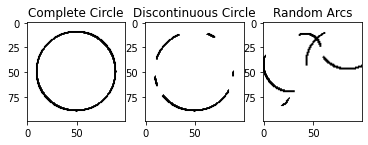

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load your images as grayscale
complete_circle = cv2.imread('dataset/is_circle/closed/reference_circle.png', cv2.IMREAD_GRAYSCALE)
discontinuous_circle = cv2.imread('dataset/is_circle/open/discontinuous_circle_10_gaps_25.png', cv2.IMREAD_GRAYSCALE)
random_arcs = cv2.imread('dataset/not_circle/random_arcs_100.png', cv2.IMREAD_GRAYSCALE)

# Display the images to verify loading
plt.subplot(131), plt.imshow(complete_circle, cmap='gray'), plt.title('Complete Circle')
plt.subplot(132), plt.imshow(discontinuous_circle, cmap='gray'), plt.title('Discontinuous Circle')
plt.subplot(133), plt.imshow(random_arcs, cmap='gray'), plt.title('Random Arcs')
plt.show()


Pixel-Based Similarity (Intersection Over Union Approach):
This approach compares how much the two binary images (circle and discontinuous circle) overlap by counting the number of common "on" pixels (value = 0, which indicates part of the circle) and dividing by the total number of pixels that belong to either of the two shapes.

In [10]:
import numpy as np

def compute_pixel_intersection(image1, image2):
    # Ensure both images are binary (0 and 1)
    binary_image1 = (image1 == 0).astype(np.uint8)
    binary_image2 = (image2 == 0).astype(np.uint8)
    
    # Compute Intersection and Union
    intersection = np.logical_and(binary_image1, binary_image2).sum()
    union = np.logical_or(binary_image1, binary_image2).sum()
    
    # Calculate Intersection over Union (IoU)
    if union == 0:
        return 0  # Avoid division by zero
    iou = intersection / union
    
    return iou

# Assuming 'complete_circle', 'discontinuous_circle', and 'random_arcs' are numpy arrays of the images
iou_discontinuous = compute_pixel_intersection(complete_circle, discontinuous_circle)
iou_random_arcs = compute_pixel_intersection(complete_circle, random_arcs)

print(f"Pixel-Based Similarity (Discontinuous Circle): {iou_discontinuous}")
print(f"Pixel-Based Similarity (Random Arcs): {iou_random_arcs}")



Pixel-Based Similarity (Discontinuous Circle): 0.5506003430531733
Pixel-Based Similarity (Random Arcs): 0.0375


 Splitting the Dataset:
 
The following code will create separate directories for training and testing images and label them accordingly.

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directories
open_dir = 'dataset/is_circle/open'
not_circle_dir = 'dataset/not_circle'
output_train_dir = 'dataset/train'
output_test_dir = 'dataset/test'

# Create train and test directories
os.makedirs(os.path.join(output_train_dir, 'is_circle'), exist_ok=True)
os.makedirs(os.path.join(output_train_dir, 'not_circle'), exist_ok=True)
os.makedirs(os.path.join(output_test_dir, 'is_circle'), exist_ok=True)
os.makedirs(os.path.join(output_test_dir, 'not_circle'), exist_ok=True)

# Function to split data
def split_data(source_dir, label, test_size=0.2):
    images = [img for img in os.listdir(source_dir) if img.endswith('.png')]
    train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(source_dir, img), os.path.join(output_train_dir, label, img))
    for img in test_images:
        shutil.copy(os.path.join(source_dir, img), os.path.join(output_test_dir, label, img))

# Split the datasets
split_data(open_dir, 'is_circle')
split_data(not_circle_dir, 'not_circle')

print("Data has been split into training and testing sets.")


Data has been split into training and testing sets.


Loading the data

In [12]:
import os
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

# Set the paths
open_dir = 'dataset/is_circle/open'
not_circle_dir = 'dataset/not_circle'
reference_circle_path = 'dataset/is_circle/closed/reference_circle.png'

# Custom dataset class
class CircleDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')  # Load image
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

# Prepare the data
open_images = [os.path.join(open_dir, img) for img in os.listdir(open_dir)]
not_circle_images = [os.path.join(not_circle_dir, img) for img in os.listdir(not_circle_dir)]

# Labels: 1 for is_circle (open), 0 for not_circle
open_labels = [1] * len(open_images)
not_circle_labels = [0] * len(not_circle_images)

# Combine and split datasets
all_images = open_images + not_circle_images
all_labels = open_labels + not_circle_labels

# Split into train and test datasets
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize to match input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize
])

# Create datasets and dataloaders
train_dataset = CircleDataset(train_images, train_labels, transform=transform)
test_dataset = CircleDataset(test_images, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Print the number of images in each dataset
print(f'Number of training images: {len(train_dataset)}')
print(f'Number of testing images: {len(test_dataset)}')


Number of training images: 2088
Number of testing images: 522


Defining UNet-based architecture for training CNNs:

In [13]:
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
import torch.nn.functional as F  # Import F for activation functions and pooling

# Define your MLP (UNet-based architecture) class here
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Define layers here, e.g.:
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 25 * 25, 128)  # Adjust dimensions based on input size
        self.fc2 = nn.Linear(128, 1)  # Output layer for binary classification

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 25 * 25)  # Flatten the output, adjust for pooling
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Custom dataset class
class CircleDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')  # Load image in grayscale
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

# Set the paths for your dataset
open_dir = 'dataset/is_circle/open'
not_circle_dir = 'dataset/not_circle'

# Prepare the data
open_images = [os.path.join(open_dir, img) for img in os.listdir(open_dir)]
not_circle_images = [os.path.join(not_circle_dir, img) for img in os.listdir(not_circle_dir)]

# Labels: 1 for is_circle (open), 0 for not_circle
open_labels = [1] * len(open_images)
not_circle_labels = [0] * len(not_circle_images)

# Combine and split datasets
all_images = open_images + not_circle_images
all_labels = open_labels + not_circle_labels

# Split into train and test datasets (80% train, 20% test)
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Define transformations
transform = transforms.Compose([
    transforms.Resize((100, 100)),  # Resize to match input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize
])

# Create datasets and dataloaders
train_dataset = CircleDataset(train_images, train_labels, transform=transform)
test_dataset = CircleDataset(test_images, test_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
model = MLP()  # Initialize your model

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)





In [17]:
# Training loop
num_epochs = 100  # Adjust as needed
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs.squeeze(), labels.float())  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update parameters
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')



Epoch [1/100], Loss: 0.0541
Epoch [2/100], Loss: 0.0450
Epoch [3/100], Loss: 0.0304
Epoch [4/100], Loss: 0.0301
Epoch [5/100], Loss: 0.0342
Epoch [6/100], Loss: 0.0213
Epoch [7/100], Loss: 0.0251
Epoch [8/100], Loss: 0.0238
Epoch [9/100], Loss: 0.0140
Epoch [10/100], Loss: 0.0124
Epoch [11/100], Loss: 0.0086
Epoch [12/100], Loss: 0.0120
Epoch [13/100], Loss: 0.0096
Epoch [14/100], Loss: 0.0098
Epoch [15/100], Loss: 0.0110
Epoch [16/100], Loss: 0.0044
Epoch [17/100], Loss: 0.0043
Epoch [18/100], Loss: 0.0035
Epoch [19/100], Loss: 0.0023
Epoch [20/100], Loss: 0.0022
Epoch [21/100], Loss: 0.0017
Epoch [22/100], Loss: 0.0015
Epoch [23/100], Loss: 0.0012
Epoch [24/100], Loss: 0.0013
Epoch [25/100], Loss: 0.0010
Epoch [26/100], Loss: 0.0011
Epoch [27/100], Loss: 0.0013
Epoch [28/100], Loss: 0.0008
Epoch [29/100], Loss: 0.0007
Epoch [30/100], Loss: 0.0006
Epoch [31/100], Loss: 0.0006
Epoch [32/100], Loss: 0.0006
Epoch [33/100], Loss: 0.0005
Epoch [34/100], Loss: 0.0005
Epoch [35/100], Loss: 0

In [18]:
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predicted = (torch.sigmoid(outputs) > 0.5).float()  # Apply sigmoid and threshold
        total += labels.size(0)
        correct += (predicted.squeeze() == labels.float()).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')



Accuracy of the model on the test set: 98.08%


Acknowledgment:  
    This assignment is collaboratively done by:   
    Keerthana - 210290  
    Meghana - 210073  
    Madhuri - 210568  
    Shobhit Sharma - 210992  